In [150]:
#importing Libraries for the projects
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [151]:
#read the data
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [152]:
df.shape

(730, 16)

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [154]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [155]:
#dteday
df.dteday.describe()

count            730
unique           730
top       01-01-2018
freq               1
Name: dteday, dtype: object

In [156]:
df['dteday'] = df['dteday'].apply(lambda x: int(x.split('-')[0]))

In [157]:
df = df.rename(columns={"dteday": "date"})

In [158]:
#season
df.season.describe()

count    730.000000
mean       2.498630
std        1.110184
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: season, dtype: float64

In [159]:
df['season'] = df['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

In [160]:
#Year
df.yr.describe()

count    730.000000
mean       0.500000
std        0.500343
min        0.000000
25%        0.000000
50%        0.500000
75%        1.000000
max        1.000000
Name: yr, dtype: float64

In [161]:
df['new_yr'] = df['yr'].map({0: 2018, 1: 2019})
df['new_yr']

0      2018
1      2018
2      2018
3      2018
4      2018
       ... 
725    2019
726    2019
727    2019
728    2019
729    2019
Name: new_yr, Length: 730, dtype: int64

In [162]:
#holidays
df.holiday.describe()

count    730.000000
mean       0.028767
std        0.167266
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: holiday, dtype: float64

In [163]:
holiday_dates = df.groupby(by='holiday').cnt.mean()

In [164]:
#weekdays
df.weekday.describe()

count    730.000000
mean       2.997260
std        2.006161
min        0.000000
25%        1.000000
50%        3.000000
75%        5.000000
max        6.000000
Name: weekday, dtype: float64

In [165]:
df.groupby(by='weekday').weekday.count()

weekday
0    105
1    105
2    104
3    103
4    104
5    104
6    105
Name: weekday, dtype: int64

In [166]:
#working day
df.workingday.describe()

count    730.000000
mean       0.683562
std        0.465405
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: workingday, dtype: float64

In [167]:
df.groupby(by='workingday').workingday.count()

workingday
0    231
1    499
Name: workingday, dtype: int64

In [168]:
#weather
df.weathersit.describe()

count    730.000000
mean       1.394521
std        0.544807
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: weathersit, dtype: float64

In [169]:
df.groupby(by='weathersit').weathersit.count().sort_values(ascending=False)

weathersit
1    463
2    246
3     21
Name: weathersit, dtype: int64

In [170]:

df['weathersit'] = df.weathersit.map({1: 'clear', 2: 'mist', 3: 'light', 4: 'heavy'})

In [171]:
df.groupby(by='weathersit').weathersit.count().sort_values(ascending=False)

weathersit
clear    463
mist     246
light     21
Name: weathersit, dtype: int64

In [172]:
coltemp = ['temp', 'Adj temp']
pd.DataFrame(np.corrcoef(df['temp'], df["atemp"]), index=coltemp, columns=coltemp)   

,temp,Adj temp
temp,1.000000,0.991696
Adj temp,0.991696,1.000000


In [173]:
df = df.drop(columns=['atemp'])

In [174]:
df.temp.describe()

count    730.000000
mean      20.319259
std        7.506729
min        2.424346
25%       13.811885
50%       20.465826
75%       26.880615
max       35.328347
Name: temp, dtype: float64

Text(0.5, 1.0, 'temp plot')

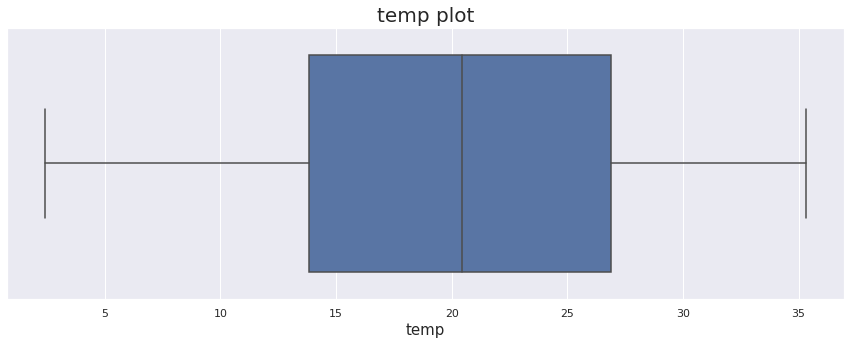

In [175]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x='temp')
plt.xlabel('temp', fontdict={'fontsize': 15})
plt.title('temp plot', fontdict={'fontsize': 20})


In [176]:
#humidity
df.hum.describe()

count    730.000000
mean      62.765175
std       14.237589
min        0.000000
25%       52.000000
50%       62.625000
75%       72.989575
max       97.250000
Name: hum, dtype: float64

Text(0.5, 1.0, 'hum plot')

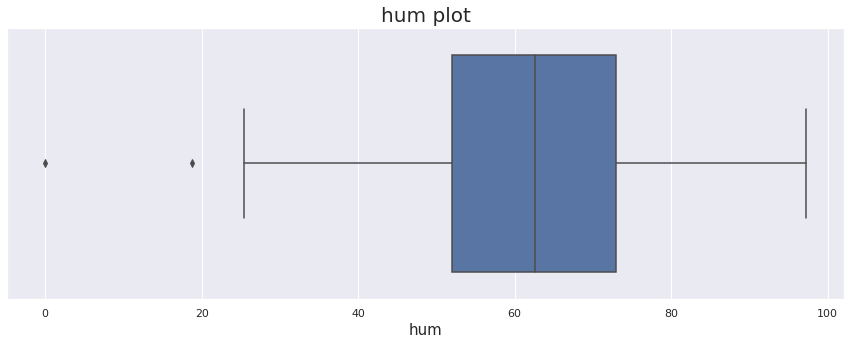

In [177]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x='hum')
plt.xlabel('hum', fontdict={'fontsize': 15})
plt.title('hum plot', fontdict={'fontsize': 20})


In [178]:
#windspeed
df.windspeed.describe()


count    730.000000
mean      12.763620
std        5.195841
min        1.500244
25%        9.041650
50%       12.125325
75%       15.625589
max       34.000021
Name: windspeed, dtype: float64

In [179]:
df = df.drop(columns=['casual', 'registered'])

In [180]:
dum_vr = ['mnth', 'season', 'weekday', 'weathersit']

In [181]:
new_dum = pd.get_dummies(df[dum_vr], drop_first=True)
new_dum.head(10)

,mnth,weekday,season_spring,season_summer,season_winter,weathersit_light,weathersit_mist
0,1,6,1,0,0,0,1
1,1,0,1,0,0,0,1
2,1,1,1,0,0,0,0
3,1,2,1,0,0,0,0
4,1,3,1,0,0,0,0
5,1,4,1,0,0,0,0
6,1,5,1,0,0,0,1
7,1,6,1,0,0,0,1
8,1,0,1,0,0,0,0
9,1,1,1,0,0,0,0


In [182]:
df = pd.concat([df, new_dum], axis=1)

In [183]:
df = df.drop(columns=dum_vr)

In [184]:
X_train, X_test = train_test_split(df, train_size=0.7, random_state=100)

In [185]:
X_train.shape

(510, 15)

In [189]:
scaler_var = ['date', 'temp', 'hum', 'windspeed']

In [187]:
scaler = MinMaxScaler()

In [190]:
X_train[scaler_var] = scaler.fit_transform(X_train[scaler_var])
X_train.head(10)


,instant,date,yr,holiday,workingday,temp,hum,windspeed,cnt,new_yr,season_spring,season_summer,season_winter,weathersit_light,weathersit_mist
576,577,1.000000,1,0,1,0.815169,0.725633,0.264686,7216,2019,0,0,0,0,0
426,427,0.066667,1,0,0,0.442393,0.640189,0.255342,4066,2019,1,0,0,0,1
728,729,0.966667,1,0,0,0.245101,0.498067,0.663106,1796,2019,1,0,0,0,0
482,483,0.900000,1,0,0,0.395666,0.504508,0.188475,4220,2019,0,1,0,0,1
111,112,0.700000,0,0,1,0.345824,0.751824,0.380981,1683,2018,0,1,0,0,1
580,581,0.100000,1,0,0,0.914852,0.632030,0.462538,6824,2019,0,0,0,0,0
500,501,0.500000,1,0,1,0.719639,0.719193,0.172431,7424,2019,0,1,0,0,0
479,480,0.800000,1,0,1,0.520271,0.440962,0.164434,6196,2019,0,1,0,0,0
472,473,0.566667,1,0,1,0.503656,0.586518,0.270032,4367,2019,0,1,0,0,1
455,456,0.000000,1,0,0,0.456929,0.696865,0.279394,6041,2019,0,1,0,0,1


In [191]:
y_train = X_train.pop('cnt')

In [192]:
LinReg = LinearRegression()
LinReg.fit(X_train, y_train)
rfe = RFE(LinReg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [193]:
col_name = X_train.columns[rfe.support_]
X_train_rfe = X_train[col_name]
X_train_sm = sm.add_constant(X_train_rfe)
LinReg = sm.OLS(y_train, X_train_sm)
LinReg_model = LinReg.fit()
LinReg_model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     184.2
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          2.95e-180
Time:                        17:51:42   Log-Likelihood:                -4137.5
No. Observations:                 510   AIC:                             8303.
Df Residuals:                     496   BIC:                             8362.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.8967      0.127     -7.085      0.000      -1.145      -0.648
instant              0.5285      0.678      0.779      0.436      -0.804       1.862
date               -91.0115    124.349     -0.732      0.465    -335.327     153.304
yr                1810.6484    255.439      7.088      0.000    1308.772    2312.525
holiday           -651.6669    237.629     -2.742      0.006   -1118.551    -184.783
workingday         154.3243     80.139      1.926      0.055      -3.129     311.778
temp              4285.2783    301.171     14.229      0.000    3693.550    4877.006
hum              -1225.1222    341.992     -3.582      0.000   -1897.054    -553.190
windspeed        -1571.3976    233.883     -6.719      0.000   -2030.922   -1111.873
new_yr               1.1940      0.168      7.126      0.000       0.865       1.523
season_spring     -583.1907    202.348     -2.882      0.004    -980.756    -185.625
season_summer      419.8648    135.972      3.088      0.002     152.713     687.016
season_winter      711.2391    162.039      4.389      0.000     392.871    1029.607
weathersit_light -2091.7485    239.545     -8.732      0.000   -2562.397   -1621.100
weathersit_mist   -463.0135     95.814     -4.832      0.000    -651.264    -274.763
==============================================================================
Omnibus:                       57.729   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.922
Skew:                          -0.553   Prob(JB):                     5.10e-35
Kurtosis:                       5.492   Cond. No.                     1.08e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.84e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""